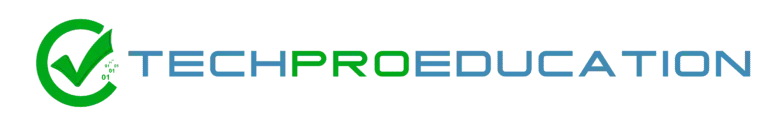

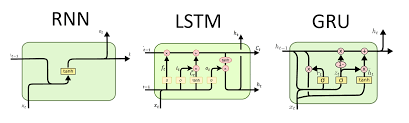

# RNN Syntax Basics

In [1]:
#kütüphaneleri yüklüyoruz..

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

Datamizi (sequence'i) kendimiz olusturacagiz. __linspace__ ile 0 ile 50 arasinda 501 sayi belirledik. Bu noktalarin sin degerlerini aldik ve bu degerleri de y' ye atadik. 

In [3]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [4]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

 Sinüs fonksiyonunun maksimum değeri 1, minimum değeri ise -1'dir.

In [5]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Amacimiz, datasetinin siradaki degerlerini tahmin ederek forecast yapmak :

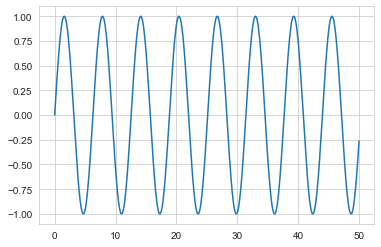

In [6]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [7]:
df = pd.DataFrame(index=x, data=y, columns=['Sine'])

Tek feature li bir dataframe olustu :

'x' değişkeni indeks olarak kullanılan verileri temsil ederken, 'y' değişkeni 'Sine' sütunu olarak kullanılan verileri temsil etmektedir. Bu kod, 'y' verilerini 'Sine' sütunu adı altında, 'x' verilerini indeks olarak kullanarak bir DataFrame oluşturmayı amaçlamaktadır.

In [8]:
df

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[501 rows x 1 columns]

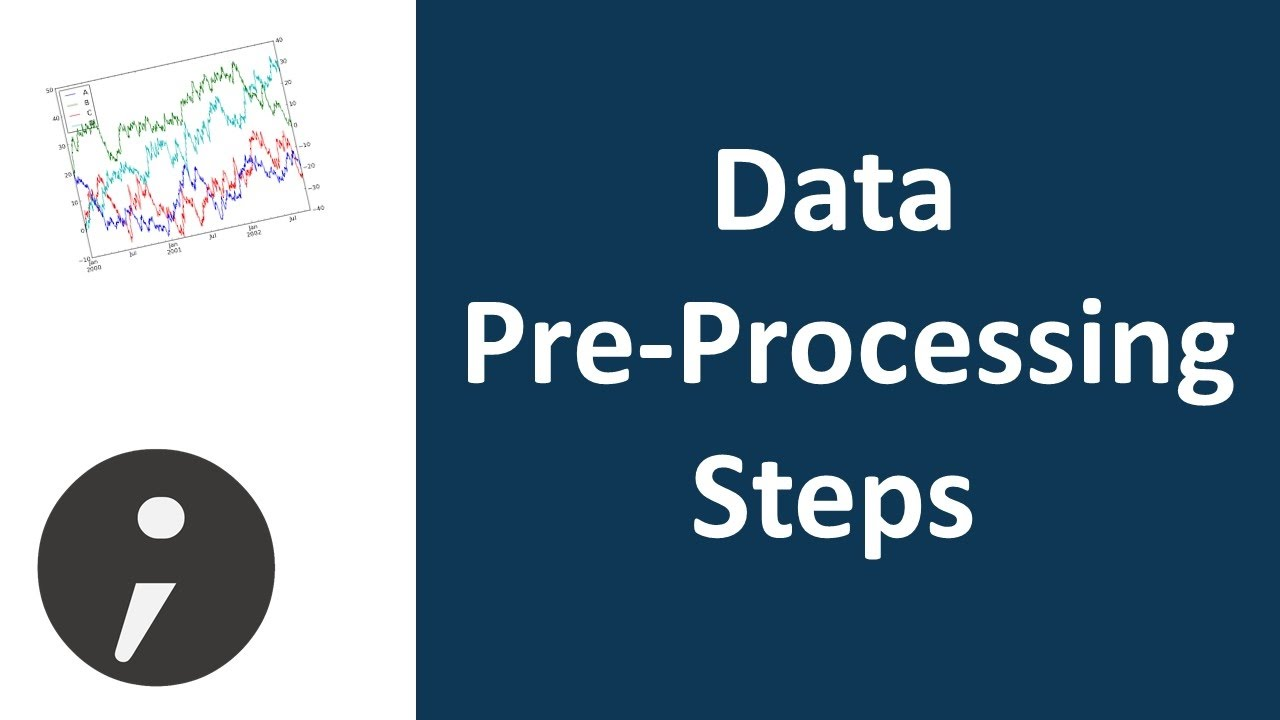

## Preprocessing of Data

### Train Test Split

In [9]:
len(df)

501

Simdiye kadar test ve train datalarini ayirirken random olarak bir bölme islemi yapiyorduk. Burda ise datamizi random olarak bölmeyecegiz cunku datamizin sirasi önemli. Bu yüzden datamizin son kismindan belli bir bölümü test datasi olarak ayıracagız.

In [10]:
test_percent = 0.15

%15' lik kisim, datasetimizde 75. indexe karsilik geliyor :

In [11]:
len(df)*test_percent

75.14999999999999

Küsurattan kurtulmak icin round ile datanin 75' e kadar olan uzunlugunu bir degiskene atadik :

In [12]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

Bu degeri df' in gercek uzunlugundan cikarirsak elimize train kismi icin kullanacagimiz data kalir. Bastan 426' ya kadar olan data train datasi, sonrasi ise test datasi olacak  :

In [13]:
test_ind = int(len(df) - test_point)
test_ind

426

Train datasi olarak test_ind' e kadar olan kismi, test datasi olarak da test_ind' den sonraki kismi aldik :

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

Bu kod örneği, bir veri çerçevesini (DataFrame) iki parçaya bölmek için kullanılır. İşte bu kodun her iki satırının ayrıntılı açıklaması:

train = df.iloc[:test_ind]: Bu satır, veri çerçevesini (DataFrame) iki parçaya bölmek ve eğitim verilerini içeren "train" ve test verilerini içeren "test" veri çerçevelerini oluşturmak için kullanılır.

df: Bu, veri çerçevesinin adı veya değişkenidir, bu durumda "df".

.iloc[]: Pandas veri çerçevelerinde, .iloc[] indeksi, belirli satırları ve sütunları seçmek için kullanılır. Bu indeks, satır ve sütun indekslerini kullanarak veriyi seçer.

[:test_ind]: Bu ifade, verinin hangi satırlarını seçeceğinizi belirtir. Burada "test_ind" adında bir değişken veya tam sayı kullanılır ve bu değişkenin değerine bağlı olarak veri bölünür. ":" operatörü, verinin başlangıcından belirtilen indekse kadar olan tüm satırları seçer.

train = df.iloc[:test_ind]: Bu satır, "df" veri çerçevesinin başından "test_ind" indeksine kadar olan satırları seçer ve bu satırları "train" adlı yeni bir veri çerçevesine atar. Bu, eğitim verilerini içeren "train" veri çerçevesini oluşturur.

test = df.iloc[test_ind:]: Bu satır, "df" veri çerçevesinin "test_ind" indeksinden sonraki tüm satırları seçer ve bu satırları "test" adlı yeni bir veri çerçevesine atar. Bu, test verilerini içeren "test" veri çerçevesini oluşturur.

Sonuç olarak, bu kod örneği veri çerçevesini eğitim ve test verileri olarak iki ayrı parçaya böler. "train" veri çerçevesi eğitim verilerini içerirken, "test" veri çerçevesi test verilerini içerir. Bu, genellikle makine öğrenimi modelini eğitmek ve test etmek için kullanılan yaygın bir işlemdir.

In [15]:
train

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
42.100 -0.952
42.200 -0.978
42.300 -0.994
42.400 -1.000
42.500 -0.996

[426 rows x 1 columns]

In [16]:
test

Sine
42.600 -0.982
42.700 -0.959
42.800 -0.925
42.900 -0.883
43.000 -0.832
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[75 rows x 1 columns]

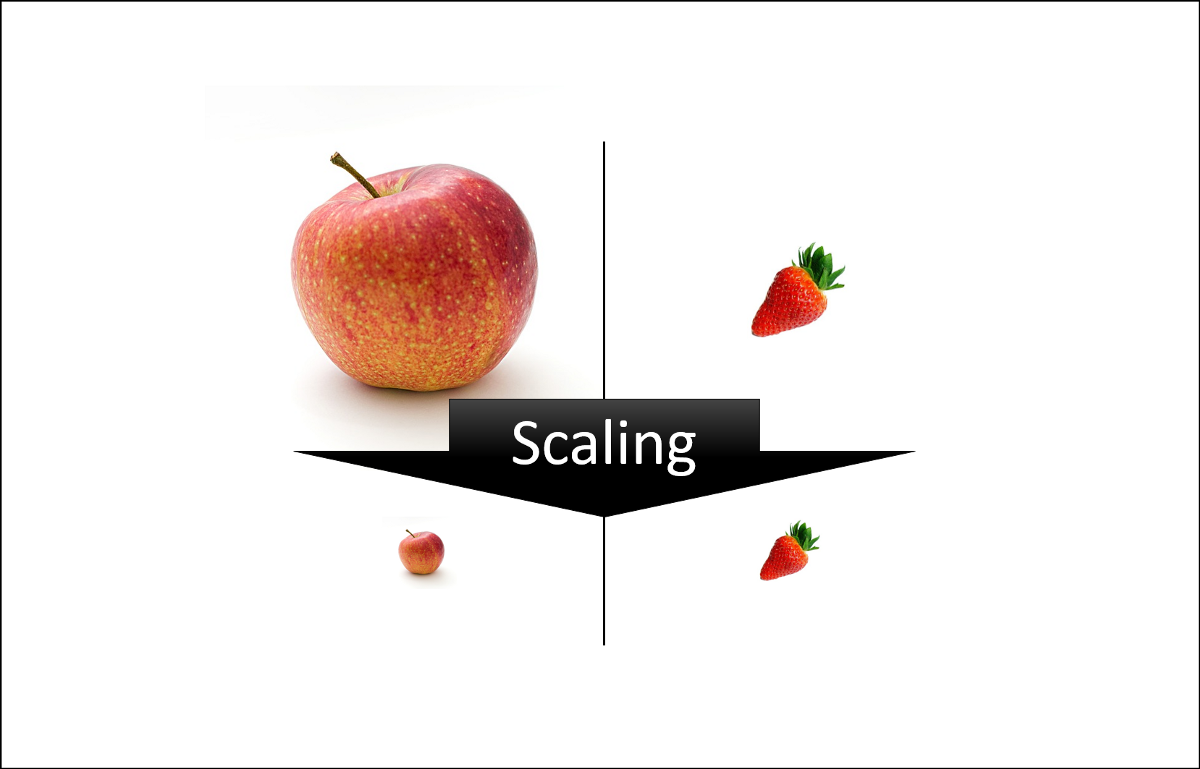

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

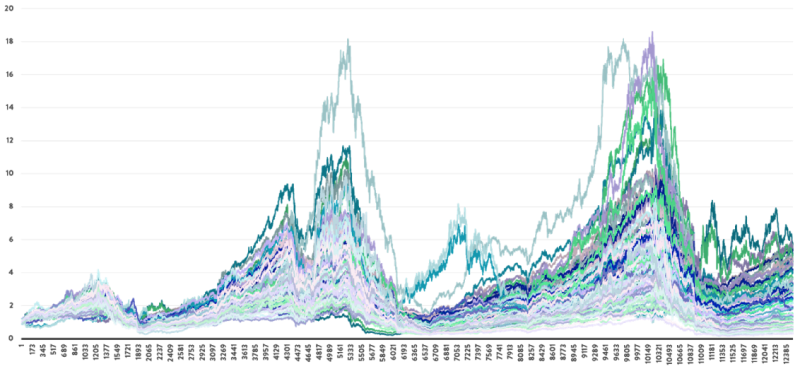

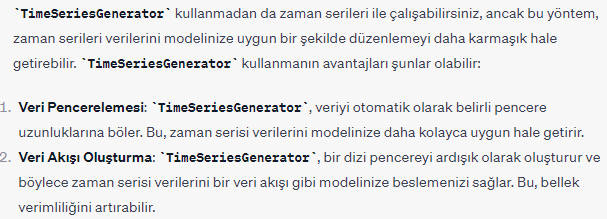

## Time Series Generator

TimeSeriesGenerator, veri üzerinde bir değişiklik yapmaz. Bu sınıf, zaman serisi verilerini belirli bir yapıda veri gruplarına bölmek ve bu grupları bir eğitim veya tahminleme modeline beslemek için kullanılır. Yani, veriye bir görüntü veya pencere pencereleme yaklaşımı uygular, ancak veriyi değiştirmez.

Bu nedenle, TimeSeriesGenerator kullanırken asıl veri setiniz değişmez ve korunur. Bu sınıf, veriyi daha iyi modele uygun hale getirmek veya modelin daha iyi performans göstermesini sağlamak için kullanılır, ancak asıl veriyi değiştirmez.

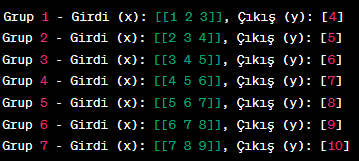

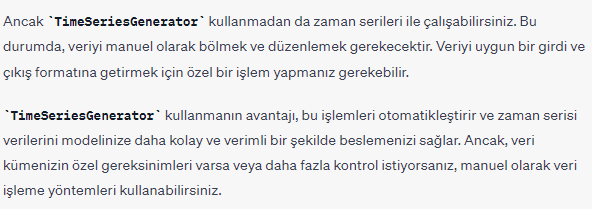

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

__TimeSeriesGenerator --->__ CNN' deki ImageDataGenerator ile benzer islemleri yapar.

Generator icinde __data__ ve __targets__ olarak __train_scaled__ datasini kullandik. Cunku RNN' de tahmin yapacak feature ile target label ayni feature.

__length=3 --->__ sequence' lerin uzunlugu. "3 satirdan aldigin bilgiye göre 4.' yü tahmin et."

__batch_size --->__ 'Bir batch' de yukardaki şarta gore kac data olacak?' Biz burda tek tek yaptik fakat buyuk datasetlerinde bunu yapmak mümkün degil. (Tavsiye edilen, mümkünse tek tek yapilmasidir.)

__stride=1 --->__ Ilk 2 veriden sonra 3. tahmin edilecek; sonra bir adim kayilarak 2 ve 3'e göre 4 tahmin edilecek. Bu islem sona kadar devam edecek.

In [21]:
#help(TimeseriesGenerator)

In [22]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,                
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

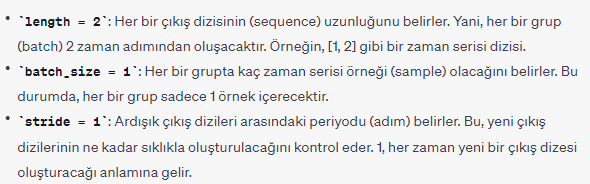

In [23]:
len(train_scaled)

426

Scale edilmis data 426 tane olmasina ragmen Generator, 426 tane data olusturdu. __length=2__ oldugu icin datasetinin son iki degerinden sonra tahmin islemini yapacagi bir data kalmiyor. Bu yuzden son iki satiri kullanamaz. Generator sayisi;__len(generator)= (len(train)-lenght)/(batch_size*stride)__ formulu ile hesaplanir.

In [24]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 
# 426-2/1x1

424

In [25]:
generator

Generator, 0. index' te t_train ve y_train degerlerini verdi. x_train' de length uzunlugundan dolayi 2 deger var. Bu iki degere gore 3. deger tahmin edilecek :

In [26]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [27]:
# What does the first batch look like?
X, y = generator[0]

Generator' i daha rahat gorebilmek icin X ve y' ye attik. Sonra yazdirdik. Verilen array' ler ve tahmin edilmesi gereken 3. satiri görüyoruz :

In [28]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


Ilk 3 degeri asagida train_scaled datasinda da gorebiliriz :

In [29]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

Asagidaki parametre degerlerini degistirdik ve önceki ile farki kiyasladik :

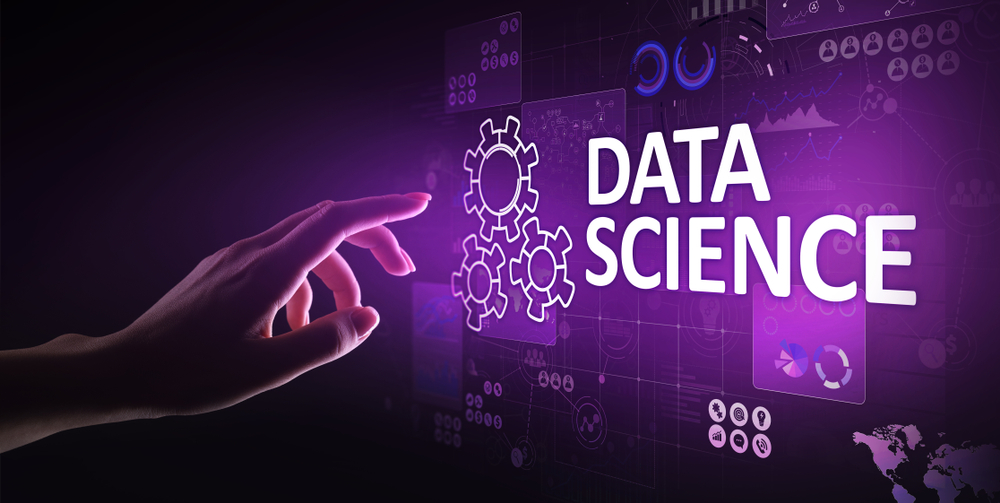

In [30]:
# define generator
length = 3 # Length of the output sequences (in number of timesteps)
batch_size = 2 # Number of timeseries samples in each batch
stride = 2 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,                 
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [31]:
len(train_scaled)

426

In [32]:
len(generator)

106

106 tane generator üretti. (426 - 3)/(2 *2) = 106

In [33]:
generator

Ilk üclüden 0.64776041 degerini sonraki üclüden ise 0.73971381 degerini tahmin edecek :

In [34]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458]],
 
        [[0.59933458],
         [0.64776041],
         [0.69470985]]]),
 array([[0.64776041],
        [0.73971381]]))

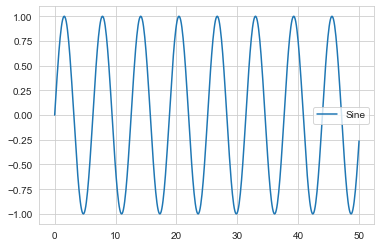

In [35]:
df.plot();

The more length the more training time

__Length degeri nasil hesaplanmali? :__ Kendini yenileyen bir periyot elde etmemiz gerekir. Ilk degerimiz 0' dan baslamis, o zaman tekrar 0 degerine geldiginde bir periyot tamamlanmis olur. Datada 501 tane nokta var, buna dayanarak hesaplama yaparsak ilk periyodun tamamlandigi noktayi 64 olarak buluruz. 64' te bir kendini tekrar eden bir periyot var diyebiliriz. batch_size=1 secerek generator' i olusturduk :

In [36]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [37]:
# What does the first batch look like?
X, y = generator[0]

426 - 64 = 362 tane generator olustu :

In [38]:
len(generator)

362

64 veri modele verilecek,  bunlara göre 65. sayi tahmin edilecek :

In [39]:
print(f'Given the Array: \n{X.flatten()}')    # Bütün rakamlari görmek icin flatten yaptik. 
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

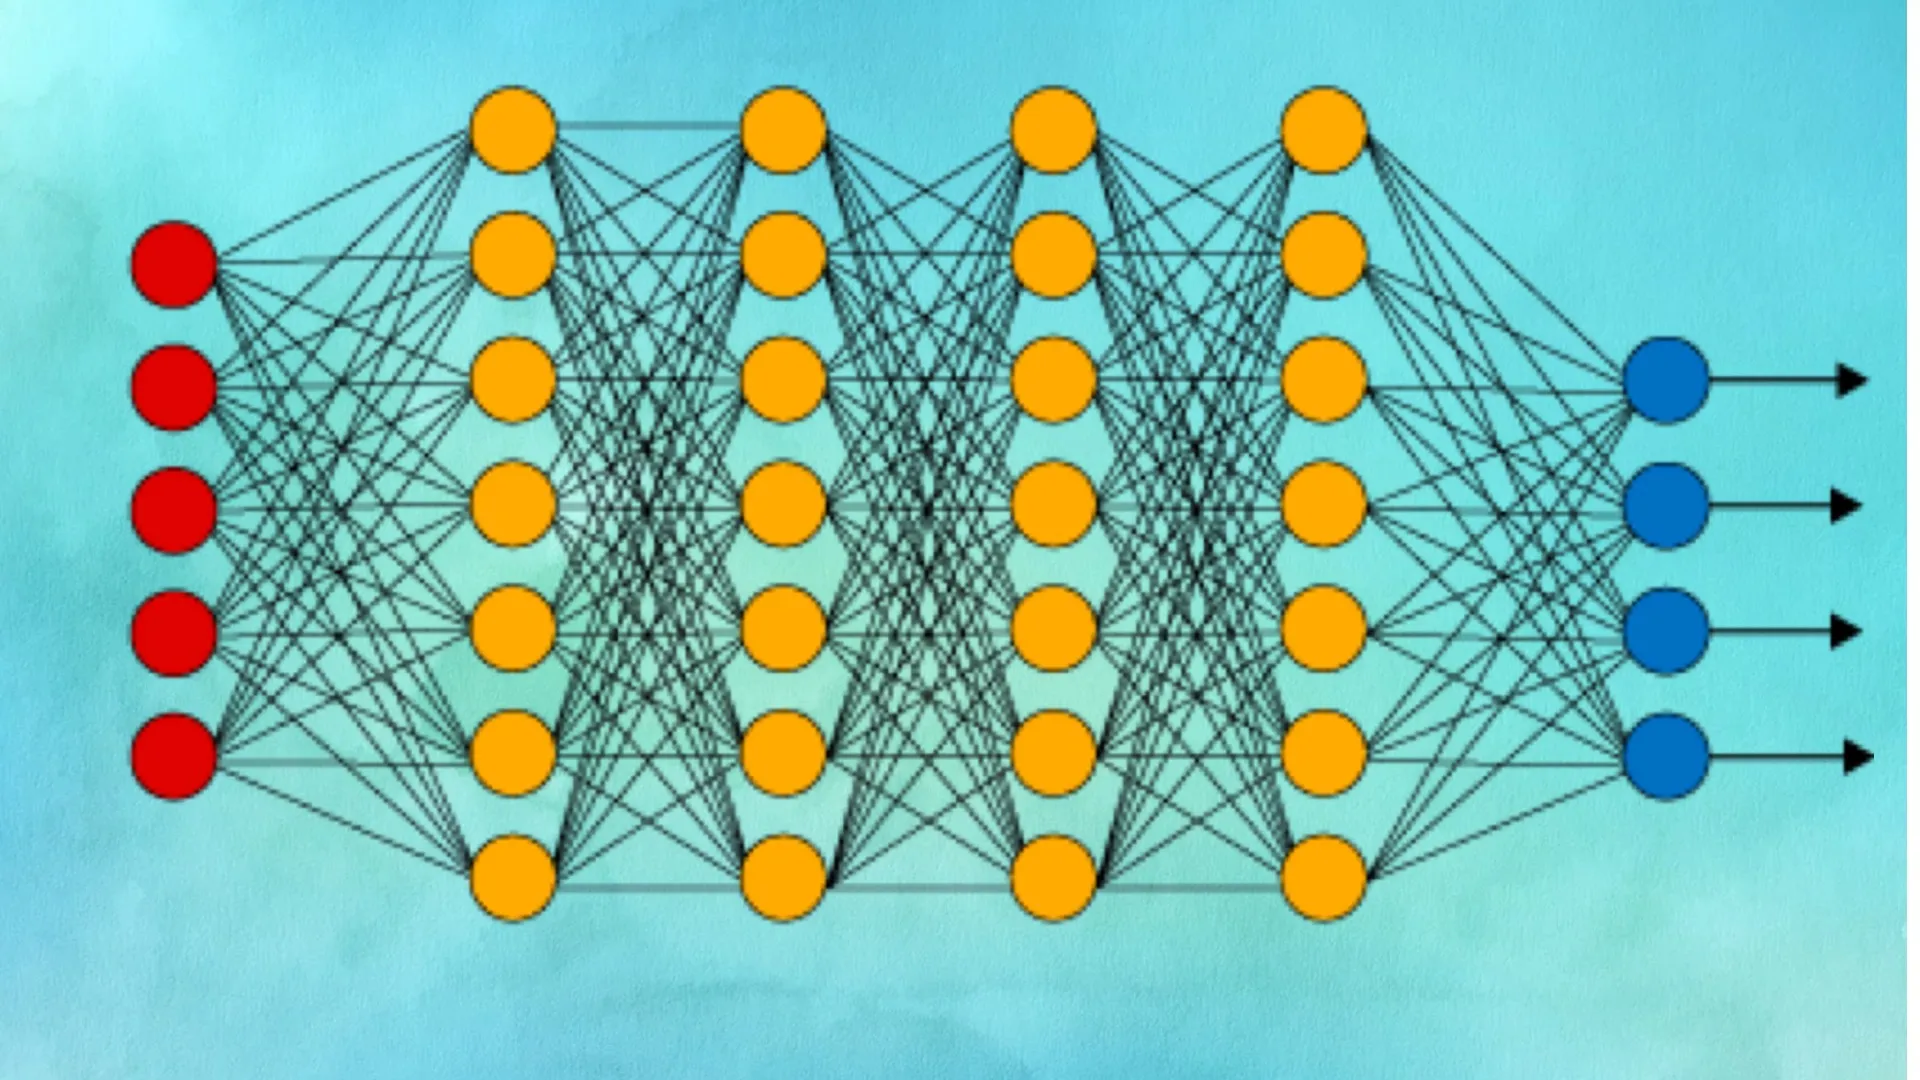

## Modelling

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [41]:
# We're only using one feature in our time series
n_features = 1

In [42]:
seed = 42

Modele bir adet hidden layer ekledik. 

__units= 100 -->__  Hidden layer' da 100 tane nöron olsun.

__input_shape=(length, n_features)) -->__ Ilk eleman satir sayisi, ikinci eleman sütun sayisini verir. length=64 satir sayisi, n_features=1 sütun sayisi.

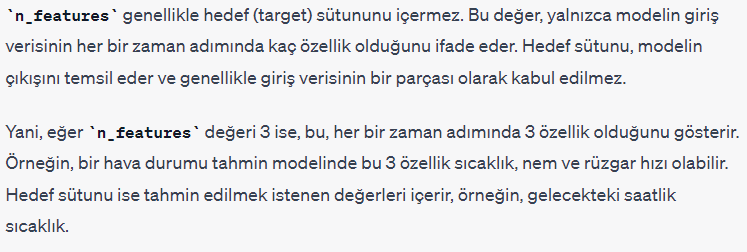

__model.add(Dense(units = 1)) -->__ Output layer' da 1 nöron var. (Regression analizi yaptigimiz icin tek bir nöron olmali.)

RNN (Recurrent Neural Network) modelleri genellikle doğruluk (accuracy) metriği yerine kayıp (loss) metriği kullanırlar. Bu durumun sebebi, RNN modellerinin zaman serileri gibi sürekli değerlerin olduğu veri setlerinde sıklıkla kullanılmasıdır.

Doğruluk metriği, sınıflandırma problemleri için kullanılırken, RNN modelleri genellikle regresyon problemlerinde kullanılır. Regresyon problemlerinde, hedef değişkenler sürekli sayısal değerlerdir ve bu değerleri doğrudan tahmin etmek amaçlanır. Bu nedenle, genellikle kayıp metrikleri (mse, rmse, vb.) kullanılır.

hem Hiperbolik Tanjant (tanh) hem de ReLU (Rectified Linear Unit) aktivasyon fonksiyonları, rekürrent sinir ağlarında (RNN) kullanılabilir.

Hiperbolik tanjant (tanh) fonksiyonu, genellikle RNN'lerde yaygın olarak kullanılan bir aktivasyon fonksiyonudur. Tanh fonksiyonu, giriş değerlerini -1 ile 1 arasında sınırlar ve negatif değerler için negatif çıktılar üretirken, pozitif değerler için pozitif çıktılar üretir. Bu nedenle, RNN'lerde gizli durumların değerleri için uygun bir aralık sağlamak için tercih edilebilir.

ReLU (Rectified Linear Unit) fonksiyonu da RNN'lerde kullanılabilecek bir aktivasyon fonksiyonudur. ReLU fonksiyonu, giriş değeri 0'dan büyükse aynı değeri, 0'dan küçükse sıfırı çıktı olarak verir. ReLU'nun avantajları arasında hesaplama hızının yüksek olması ve gradiyanın düzgün bir şekilde yayılabilmesi yer alır.

Hangi aktivasyon fonksiyonunu kullanacağınız, probleminiz ve veri setinizin özelliklerine bağlıdır. Her iki fonksiyon da farklı durumlar için uygun olabilir. Bu nedenle, RNN'lerinizde hem tanh hem de ReLU fonksiyonlarını deneyerek hangisinin daha iyi sonuçlar verdiğini gözlemlemek önemlidir.

In [44]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))   

model.compile(optimizer='adam', loss='mse')

input_shape parametresi, girdi verisinin boyutunu belirtir. length girdi dizisinin zaman adımları sayısını, n_features ise her bir zaman adımında kullanılan özellik sayısını temsil eder.

Hidden layer' da cok fazla parametre var. ANN modeli kursaydik cok daha az parametre olurdu. (Simple RNN yerine LSTM kullansaydik, 4 gate oldugu icin 4 kat parametremiz olacakti) :

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


Parametre sayisini bulmak icin formul :

In [46]:
# params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2))

10200

In [47]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
362/362 [==============================] - 5s 12ms/step - loss: 0.0112
Epoch 2/5
362/362 [==============================] - 4s 12ms/step - loss: 2.0675e-04
Epoch 3/5
362/362 [==============================] - 4s 12ms/step - loss: 3.0612e-04
Epoch 4/5
362/362 [==============================] - 5s 13ms/step - loss: 3.4155e-04
Epoch 5/5
362/362 [==============================] - 4s 12ms/step - loss: 2.2701e-04


Elimizde validation datasi olmadigi icin overfit durumu var mi yok mu göremiyoruz :

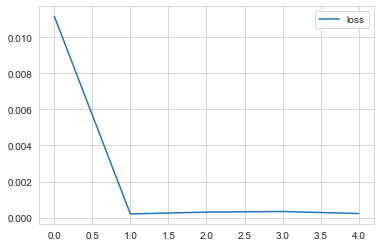

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

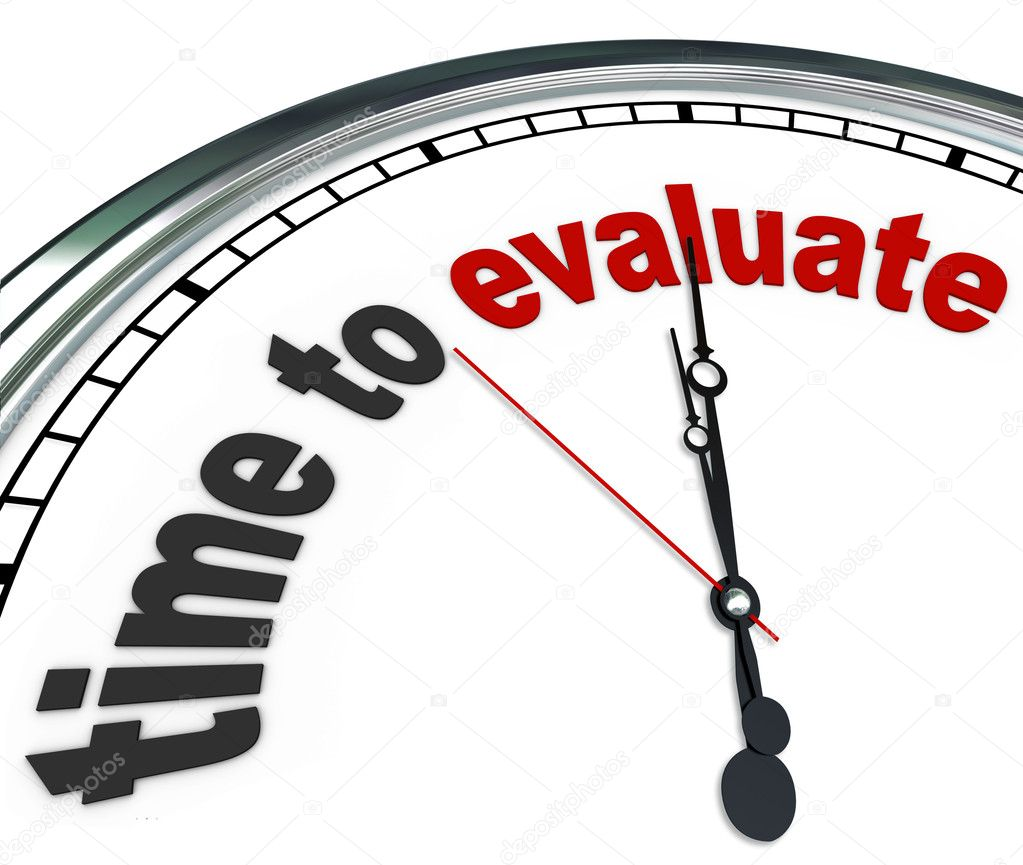

## Evaluate on Test Data

Datayi degerlendirmek icin train datasi üzerine forecast yapmamiz gerekir. 

__length__ uzunlugumuz kac ise sondan o kadarlik datayi alacagiz ve bu verilere gore bir sonraki adimi tahmin etmeye calisacagiz. Yaptigimiz tahmini de dataya katarak sequence' i bir ileri tasiyacagiz ve bir sonraki adimi tahmin etmeye calisacagiz. Bu sekilde yeni tahminleri de sona ekleyerek sirayla sonraki adimlari tahmin ederek istedigimiz adim kadar gidecegiz. (length uzunlugu kadar forecast yapilmasi önerilir). Buradaki datamiz basit bir data oldugu icin forecast islemini uzatabiliriz.

In [49]:
first_eval_batch = train_scaled[-length:]

Datanin sonundan __length__ kadar olan veriyi aldik (Son 64 deger) :

In [50]:
first_eval_batch.shape

(64, 1)

Datanin shape' i (64,1) fakat modelin bekledigi shape, (1,64,1) yani 3 boyutlu.

In [51]:
generator[0][0].shape

(1, 64, 1)

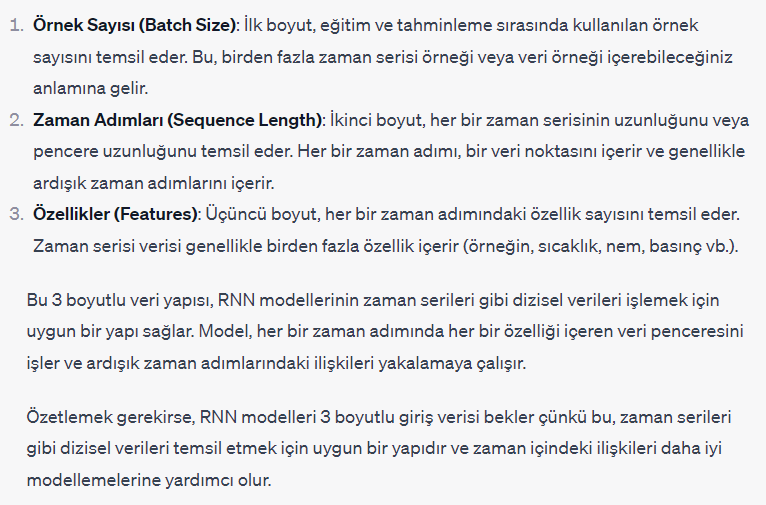

Boyut degistirme icin 2 yöntem var. Ilki, basina 1 koyarak boyutu 2' den 3' e cikarma. Ikincisi ise __expand_dim__ fonksiyonu :

In [52]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [53]:
first_eval_batch.shape

(1, 64, 1)

Boyutunu modele gore uyarladigimiz datayi prediction icin verebiliriz. Model, datadaki 64 degere göre 65. degerin ne oldugunu tahmin edecek :

In [54]:
model.predict(first_eval_batch)

array([[0.00595551]], dtype=float32)

Buldugumuz bu tahmini, test datasinin ilk elemani ile kiyaslayacagiz. Model gercekten bu degere yakin bir tahmin yapti. Yapilan prediction 2 boyutlu bir array :

In [55]:
test_scaled[0]

array([0.00885189])

__ÖZETLE ;__ test_prediction isimli bos bir kume olusturduk. Bu bos kumenin icine yaptigimiz prediction' lari atacagiz. first_eval_batch degiskenine train datasinin son length uzunlugu kadar olan datayi attik, reshape ile boyutunu 2 boyuttan 3' e cikardik. Asagidaki for döngüsünün icine bunlari tanimlayacagiz : 

In [56]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [57]:
current_batch.shape

(1, 64, 1)

In [58]:
current_batch    # 64' lü data

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [61]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

Yukarida modelimize, 64 degere gore 65. degeri tahmin ettirmistik (0.0085). Bastaki degeri attik onun yerine buldugumuz 65. prediction degerini __np.append__ yöntemi ile son kisma ekledik :

__np.append__ icine bir array, array' in altina eklenecek prediction degeri ve hangi axis' e eklenmesi gerektigi bilgisini ister. 

__current_batch[:,1:,:] --->__ 1 yazdigimiz kisim satir sayisini ifade ettigimiz kisim. Bu kismi degistirerek indexi 0' dan degil, 1' den baslatmasini söylemis olduk. (En sondaki nokta sütun sayisi). Bu islemden sonra satir sayisi 63' e düstü. Sonuna yeni buldugumuz prediction degerini 3 boyutlu hale getirerek ekledik. Boylece sample sayisi yine 64' e tamamlanmis oldu.

### Final For Loop to predict step by step 

Yukarida yaptigimiz islemin aynisini for döngüsü ile 75 test datasi boyunca yapacagiz. Yukarida yazdigimiz kodlarin aynisini for döngüsü icine tanimladik. Test datasinin uzunlugu boyunca her islemde prediction yapacak ve yaptigi prediction' i tanimlanan bos liste icine atacak. Son olarak current_batch' i güncelleyerek her seferinde gelen yeni tahmini ekleyip bastan bir sample cikaracak. Burdan cikan forecast sonuclarini daha sonra test datasi ile kiyaslayacagiz :

In [62]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

Forecast isleminde yapilan prediction' lar :

In [63]:
predictions_scaled

[array([0.00595551], dtype=float32),
 array([0.01630117], dtype=float32),
 array([0.03087705], dtype=float32),
 array([0.04957183], dtype=float32),
 array([0.07229578], dtype=float32),
 array([0.09956775], dtype=float32),
 array([0.12957872], dtype=float32),
 array([0.16340436], dtype=float32),
 array([0.20115899], dtype=float32),
 array([0.24226902], dtype=float32),
 array([0.28567716], dtype=float32),
 array([0.33212304], dtype=float32),
 array([0.3815841], dtype=float32),
 array([0.4318156], dtype=float32),
 array([0.48403895], dtype=float32),
 array([0.53755164], dtype=float32),
 array([0.5914456], dtype=float32),
 array([0.64466786], dtype=float32),
 array([0.69723654], dtype=float32),
 array([0.7482096], dtype=float32),
 array([0.796081], dtype=float32),
 array([0.84136236], dtype=float32),
 array([0.882667], dtype=float32),
 array([0.91932565], dtype=float32),
 array([0.95072454], dtype=float32),
 array([0.97745526], dtype=float32),
 array([0.99781203], dtype=float32),
 array([1

Test datasindaki gercek degerler :

In [64]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

Gercek degerler ile prediction' lari kiyaslamadan once prediction degerlerini __inverse_transform__ ile gercek degerlere donusturduk ki kiyaslama yapabilelim :

Bu kod satırı, bir dönüşüm işlemi gerçekleştirerek ölçeklendirilmiş tahminleri (scaled predictions) orijinal veri ölçeğine (scale) geri döndürmeye yardımcı olur. Bu işlem, özellikle veri ölçekleme (scaling) işlemi uygulandığında tahminlerin orijinal veri aralığına geri getirilmesi gerektiği durumlarda kullanışlıdır.

Açıklamalar:

predictions: Bu değişken, tahmin edilen değerlerin ölçeklendirilmiş sürümünü içerir. Yani, bu tahminler, belirli bir ölçekleme işlemi uygulandıktan sonra elde edilmiş olabilir.

scaler: Bu, kullanılan ölçekleme işlemi veya dönüşümü temsil eden bir ölçekleme nesnesidir. Özellikle Min-Max ölçekleme veya Standartlaştırma (Standardization) gibi ölçekleme yöntemleri kullanıldığında, bu nesne veri dönüşümünü gerçekleştirir.

inverse_transform(): Bu metod, ölçeklendirilmiş verileri orijinal veri aralığına geri döndürmek için kullanılır. Yani, tahminleri ölçeklendirilmiş hallerinden orijinal hallerine döndürür.

Sonuç olarak, predictions içindeki tahmin değerleri, scaler nesnesi kullanılarak ölçeklendirilmiş hallerinden orijinal veri aralığına geri döndürülür ve orijinal değerlerle karşılaştırılabilir veya sonuçlar daha anlamlı hale getirilebilir. Bu işlem, tahminlerin orijinal veri ölçeği ile uyumlu olmasını sağlar.

In [65]:
predictions = scaler.inverse_transform(predictions_scaled)

In [66]:
predictions

array([[-0.98807928],
       [-0.96738813],
       [-0.9382366 ],
       [-0.90084735],
       [-0.8553998 ],
       [-0.80085631],
       [-0.74083484],
       [-0.67318411],
       [-0.59767546],
       [-0.51545605],
       [-0.42864046],
       [-0.33574946],
       [-0.23682812],
       [-0.13636595],
       [-0.03192008],
       [ 0.07510445],
       [ 0.18289155],
       [ 0.28933517],
       [ 0.39447168],
       [ 0.49641698],
       [ 0.59215903],
       [ 0.682721  ],
       [ 0.76532964],
       [ 0.83864634],
       [ 0.90144362],
       [ 0.95490462],
       [ 0.99561784],
       [ 1.02495597],
       [ 1.0425113 ],
       [ 1.04866984],
       [ 1.04368717],
       [ 1.02707978],
       [ 1.00109237],
       [ 0.96446048],
       [ 0.91890132],
       [ 0.86464424],
       [ 0.80267057],
       [ 0.73274213],
       [ 0.65692682],
       [ 0.57479765],
       [ 0.48742092],
       [ 0.39558902],
       [ 0.29987569],
       [ 0.20209935],
       [ 0.1017915 ],
       [ 0

In [67]:
test

Sine
42.600 -0.982
42.700 -0.959
42.800 -0.925
42.900 -0.883
43.000 -0.832
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[75 rows x 1 columns]

Test datasina predictions' lari yeni bir sütun olarak ekledik :

In [68]:
test['RNN_Predictions'] = predictions

In [69]:
test

Sine  RNN_Predictions
42.600 -0.982           -0.988
42.700 -0.959           -0.967
42.800 -0.925           -0.938
42.900 -0.883           -0.901
43.000 -0.832           -0.855
...       ...              ...
49.600 -0.617           -0.552
49.700 -0.536           -0.485
49.800 -0.449           -0.415
49.900 -0.357           -0.342
50.000 -0.262           -0.266

[75 rows x 2 columns]

Gercek degerler ile prediction degerleri oldukca uyumlu :

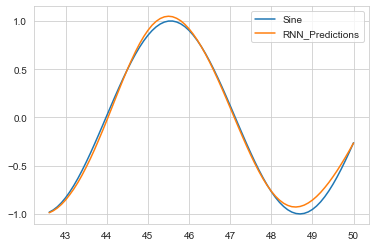

In [70]:
test.plot();

## Retrain and Forecasting

Model performansimiza baktiktan sonra tüm data ile modeli olusturup forecast yapacagiz. Tüm dataya scale islemi uyguladik :

In [71]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

TimeseriesGenerator icindeki data ve target kisimlarina tüm datayi verdik. length ve batch_size degerlerini egitimdeki ile ayni verdik :

In [72]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

En son olusturdugumuz LSTM modeli ile ayni degerlerle modelimizi olusturduk. Sadece epoch sayisini 6' ya düşürdük cünkü yukarida model 5 epoch' da egitimini tamamlamisti. Validation datasi olmadigi icin EarlyStop koyamiyoruz. Bu yüzden 6 epoch vererek egitimi tamamladik :

In [73]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))   

model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator, epochs = 6)

Epoch 1/6
437/437 [==============================] - 6s 12ms/step - loss: 0.0089
Epoch 2/6
437/437 [==============================] - 5s 12ms/step - loss: 0.0010
Epoch 3/6
437/437 [==============================] - 5s 12ms/step - loss: 3.2868e-05
Epoch 4/6
437/437 [==============================] - 5s 12ms/step - loss: 7.5142e-05
Epoch 5/6
437/437 [==============================] - 5s 12ms/step - loss: 2.1154e-04
Epoch 6/6
437/437 [==============================] - 5s 12ms/step - loss: 2.2251e-05


Yapacagimiz forecast' in uzunlugu, length kadar yani 64 uzunlugunda olacak.  Forecast sonuclarini herhangi bir seyle kiyaslayamayacagiz. Sadece tahminleri orjinal df' in devamina ekleyerek görsellestirecegiz.

In [74]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)


In [75]:
forecast = scaler.inverse_transform(forecast)

In [76]:
forecast

array([[-0.16586232],
       [-0.06838865],
       [ 0.028396  ],
       [ 0.12341374],
       [ 0.21548108],
       [ 0.30346816],
       [ 0.38633845],
       [ 0.46343453],
       [ 0.53423391],
       [ 0.59811456],
       [ 0.65499112],
       [ 0.70471387],
       [ 0.74701971],
       [ 0.78204729],
       [ 0.8097413 ],
       [ 0.82989966],
       [ 0.8428234 ],
       [ 0.84832951],
       [ 0.84642766],
       [ 0.83718151],
       [ 0.82073469],
       [ 0.79695096],
       [ 0.76623014],
       [ 0.7286093 ],
       [ 0.68423423],
       [ 0.63356282],
       [ 0.5768398 ],
       [ 0.51441445],
       [ 0.44691703],
       [ 0.37475236],
       [ 0.29840299],
       [ 0.21865274],
       [ 0.13597508],
       [ 0.0509681 ],
       [-0.03556988],
       [-0.12301301],
       [-0.21082508],
       [-0.2980795 ],
       [-0.38418225],
       [-0.46844228],
       [-0.54988657],
       [-0.62772717],
       [-0.70125535],
       [-0.76927134],
       [-0.83103467],
       [-0

In [77]:
df

Sine
0.000   0.000
0.100   0.100
0.200   0.199
0.300   0.296
0.400   0.389
...       ...
49.600 -0.617
49.700 -0.536
49.800 -0.449
49.900 -0.357
50.000 -0.262

[501 rows x 1 columns]

<Axes: >

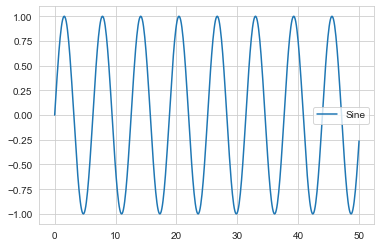

In [78]:
df.plot()

Tahminleri ve orjinal df' i görsellestirmek icin forecast' lere index olusturmamiz gerekir. Bu index' lerin de df' e uygun olmasi gerekir. df' teki index' ler 0.1 steplerle gitmis ve en son 50.00' da bitmis. Forecast' ler de bunun arkasina gelecek sekilde 50.1, 50.2 seklinde gitmeli.

In [79]:
forecast_len = len(forecast)
forecast_len

64

In [80]:
step = 0.1

In [81]:
forecast_len * step

6.4

forecast' indexi 50.1' den baslayacak üzerine toplamda 6.4 eklenecek ve 56.5' e kadar gelecek. step=0.1 olacak. Bu sekilde 64 tane index olusturduk ve bir degiskene atadik :

In [82]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [83]:
len(forecast_index)

64

Iki plot' u beraber cizdirerek bir görsel elde ettik. df indexi ve df sütunu ile bir plot islemi yaptik. forecast indexi ile de forecast' i vererek diger plot islemini yaptik. Forecast tahminlerini datanin sonunda gormus olduk. (Her calistirmada farkli sonuclar alinabilir.)

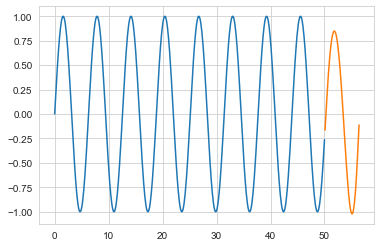

In [84]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

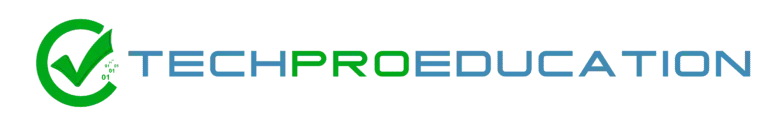